In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
june = pd.read_csv('CRMLSSold202406_filled.csv')
july = pd.read_csv('CRMLSSold202407_filled.csv')
august = pd.read_csv('CRMLSSold202408.csv')
sep = pd.read_csv('CRMLSSold202409.csv')
oct = pd.read_csv('CRMLSSold202410.csv')
nov = pd.read_csv('CRMLSSold202411.csv')

In [3]:
june

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,RanchoSoutheast,RanchoSoutheast,NaN,True,NaN,NaN,True,1250.0,543227709,pat@patowen.com,...,0.0,False,0.0,Menifee Union,92587,0.0,12197.0,NaN,True,True
1,BeverlyHillsGreaterLA,BeverlyHillsGreaterLA,NaN,True,NaN,NaN,NaN,2100000.0,531525691,andrew@epicpropertygroup.com,...,NaN,False,NaN,NaN,91206,NaN,437284.0,NaN,False,False
2,JoshuaTreeGateway,JoshuaTreeGateway,NaN,True,NaN,NaN,NaN,179000.0,531017430,bryan@jtmodern.com,...,NaN,False,NaN,NaN,92252,0.0,875556.0,NaN,True,True
3,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,14500.0,530411639,trustdee@aol.com,...,NaN,False,NaN,NaN,92345,NaN,871200.0,NaN,True,True
4,Southland,Southland,NaN,True,NaN,NaN,NaN,720000.0,526412917,karen@goldenoakrealty.com,...,NaN,False,NaN,NaN,93510,0.0,2576054.0,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24323,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,3600000.0,1002458546,rb@cbcdesert.com,...,NaN,False,NaN,NaN,92344,NaN,3300977.0,NaN,True,True
24324,Southland,Southland,NaN,True,NaN,NaN,NaN,8500.0,1001922099,tompaul@kw.com,...,NaN,False,NaN,NaN,93536,0.0,108900.0,NaN,True,True
24325,Fresno,Fresno,NaN,True,NaN,NaN,NaN,45000.0,1001759754,vickie@realtyconcepts.com,...,NaN,False,NaN,NaN,93643,200.0,33541.2,NaN,True,True
24326,Southland,Southland,NaN,True,NaN,NaN,NaN,22500.0,1001725703,ann@anntrussell.com,...,NaN,False,NaN,NaN,93560,0.0,221720.0,NaN,True,True


In [13]:
(june['PoolPrivateYN']).isna().sum()

3583

In [17]:
# Permutation test to confirm that homes with private pools cost more
grouped = june.groupby('PoolPrivateYN')['ClosePrice'].mean()
obs = grouped.loc[True] - grouped.loc[False]
print(f'observed difference between two groups: {obs}')

june_copy = june.copy()
diffs = []
# simulate 500 times, shuffle label of private pools
for i in range(500):
    june_copy['shuffled_pool'] = np.random.permutation(june_copy['PoolPrivateYN'])
    pool_groups = june_copy.groupby('shuffled_pool')['ClosePrice'].mean()
    stat = pool_groups[True] - pool_groups[False]
    diffs.append(stat)

diffs = np.array(diffs)
print(f'The p value is {(diffs >= obs).mean()}')

observed difference between two groups: 499859.7717617275
The p value is 0.0


Because the p value is low, we can conlude that having a pool increases house price

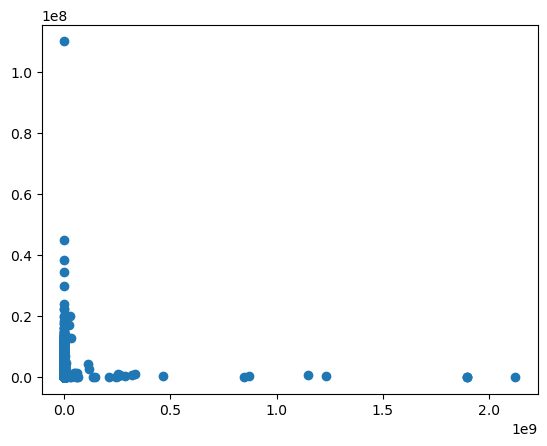

In [20]:
# Lot size doesn't have too much to do with list price
plt.scatter(june['LotSizeSquareFeet'], june['OriginalListPrice'])